# Small keras example

Started with a copy from https://keras.io/examples/vision/mnist_convnet/

## Import libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


## prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


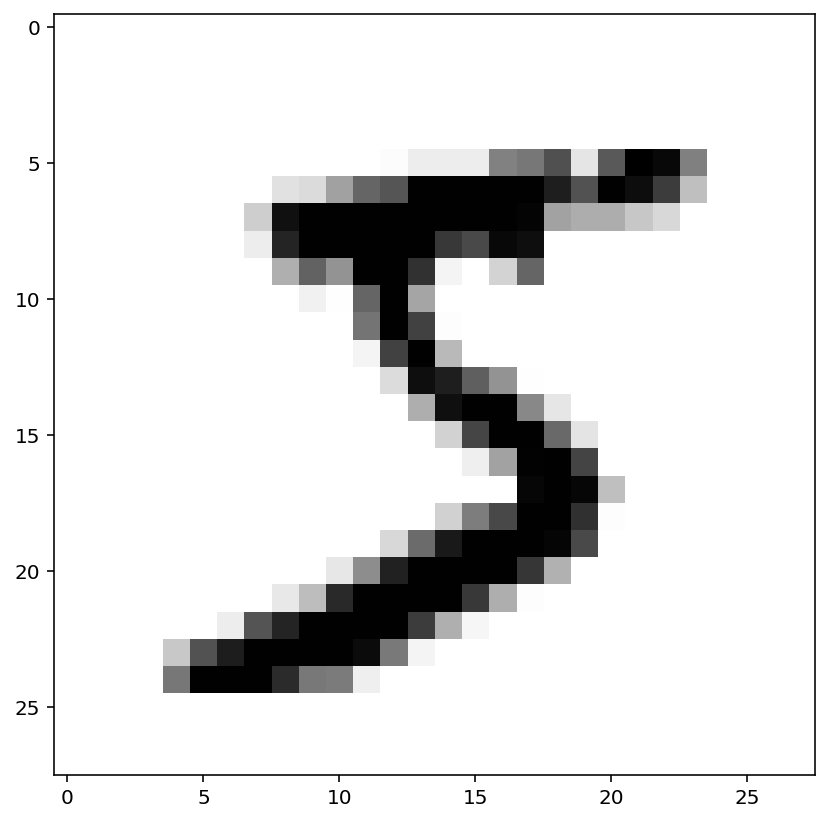

In [3]:
i=0
#plt.pcolormesh(np.flipud(x_train[i,:,:,0]))
plt.imshow(x_train[i,:,:,0],cmap=plt.cm.binary)
print(y_train[i,:])

## Build a model

In [4]:
if True:
   model = keras.Sequential(
      [
         keras.Input(shape=input_shape),
         layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
         layers.MaxPooling2D(pool_size=(2, 2)), # 28-4 /2 = 12
         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
         layers.MaxPooling2D(pool_size=(2, 2)), # 12-2 /2 = 5
         layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
         layers.Flatten(),
         layers.Dropout(0.2),
         layers.Dense(num_classes, activation="softmax"),
      ]
   )



if False:
   drop_rate=0.2
   model = keras.Sequential(
      [
         keras.Input(shape=input_shape),
         layers.Flatten(),
         layers.Dense(56, activation="relu",kernel_initializer="glorot_uniform",kernel_regularizer=keras.regularizers.l2(l2=0.001)),
         layers.Dropout(drop_rate),
         layers.Dense(28, activation="relu",kernel_regularizer=keras.regularizers.l2(l2=0.001)),
         layers.Dense(10, activation="softmax")
      ]
   )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dropout (Dropout)            (None, 144)               0

2022-11-09 08:25:42.101944: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-09 08:25:42.103479: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 08:25:42.109804: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Train the model

In [5]:
batch_size = 600 #128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-11-09 08:25:46.119886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-09 08:25:46.135526: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2800210000 Hz


Epoch 1/15


 1/90 [..............................] - ETA: 1:35 - loss: 2.3160 - accuracy: 0.0917

 2/90 [..............................] - ETA: 22s - loss: 2.3082 - accuracy: 0.1058 

 3/90 [>.............................] - ETA: 17s - loss: 2.3021 - accuracy: 0.1152

 4/90 [>.............................] - ETA: 16s - loss: 2.2972 - accuracy: 0.1255

 5/90 [>.............................] - ETA: 14s - loss: 2.2923 - accuracy: 0.1362

 6/90 [=>............................] - ETA: 15s - loss: 2.2876 - accuracy: 0.1462

 7/90 [=>............................] - ETA: 16s - loss: 2.2833 - accuracy: 0.1555

 8/90 [=>............................] - ETA: 15s - loss: 2.2792 - accuracy: 0.1638

 9/90 [==>...........................] - ETA: 15s - loss: 2.2751 - accuracy: 0.1714

10/90 [==>...........................] - ETA: 15s - loss: 2.2710 - accuracy: 0.1784

11/90 [==>...........................] - ETA: 14s - loss: 2.2667 - accuracy: 0.1854

12/90 [===>..........................] - ETA: 14s - loss: 2.2624 - accuracy: 0.1921

13/90 [===>..........................] - ETA: 14s - loss: 2.2579 - accuracy: 0.1985

14/90 [===>..........................] - ETA: 14s - loss: 2.2534 - accuracy: 0.2046

15/90 [====>.........................] - ETA: 13s - loss: 2.2488 - accuracy: 0.2103

16/90 [====>.........................] - ETA: 13s - loss: 2.2440 - accuracy: 0.2159

17/90 [====>.........................] - ETA: 13s - loss: 2.2390 - accuracy: 0.2213

18/90 [=====>........................] - ETA: 13s - loss: 2.2337 - accuracy: 0.2267

19/90 [=====>........................] - ETA: 14s - loss: 2.2282 - accuracy: 0.2320

20/90 [=====>........................] - ETA: 13s - loss: 2.2223 - accuracy: 0.2371

21/90 [======>.......................] - ETA: 13s - loss: 2.2163 - accuracy: 0.2421

22/90 [======>.......................] - ETA: 13s - loss: 2.2101 - accuracy: 0.2469

23/90 [======>.......................] - ETA: 13s - loss: 2.2036 - accuracy: 0.2515

24/90 [=======>......................] - ETA: 12s - loss: 2.1970 - accuracy: 0.2561

25/90 [=======>......................] - ETA: 12s - loss: 2.1901 - accuracy: 0.2606

26/90 [=======>......................] - ETA: 12s - loss: 2.1831 - accuracy: 0.2650

27/90 [========>.....................] - ETA: 12s - loss: 2.1758 - accuracy: 0.2693

28/90 [========>.....................] - ETA: 12s - loss: 2.1684 - accuracy: 0.2736

29/90 [========>.....................] - ETA: 11s - loss: 2.1608 - accuracy: 0.2778

30/90 [=========>....................] - ETA: 11s - loss: 2.1529 - accuracy: 0.2819

31/90 [=========>....................] - ETA: 11s - loss: 2.1449 - accuracy: 0.2860

32/90 [=========>....................] - ETA: 11s - loss: 2.1368 - accuracy: 0.2900

33/90 [==========>...................] - ETA: 11s - loss: 2.1285 - accuracy: 0.2940

34/90 [==========>...................] - ETA: 10s - loss: 2.1201 - accuracy: 0.2980

35/90 [==========>...................] - ETA: 10s - loss: 2.1116 - accuracy: 0.3019

36/90 [===========>..................] - ETA: 10s - loss: 2.1029 - accuracy: 0.3058

37/90 [===========>..................] - ETA: 9s - loss: 2.0943 - accuracy: 0.3096 

38/90 [===========>..................] - ETA: 9s - loss: 2.0855 - accuracy: 0.3133

39/90 [============>.................] - ETA: 9s - loss: 2.0767 - accuracy: 0.3171

40/90 [============>.................] - ETA: 9s - loss: 2.0679 - accuracy: 0.3208

41/90 [============>.................] - ETA: 9s - loss: 2.0590 - accuracy: 0.3245

42/90 [=============>................] - ETA: 8s - loss: 2.0501 - accuracy: 0.3281

43/90 [=============>................] - ETA: 8s - loss: 2.0412 - accuracy: 0.3317

44/90 [=============>................] - ETA: 8s - loss: 2.0323 - accuracy: 0.3353

45/90 [==============>...............] - ETA: 8s - loss: 2.0233 - accuracy: 0.3388

46/90 [==============>...............] - ETA: 8s - loss: 2.0144 - accuracy: 0.3423

47/90 [==============>...............] - ETA: 7s - loss: 2.0056 - accuracy: 0.3457

48/90 [===============>..............] - ETA: 7s - loss: 1.9967 - accuracy: 0.3491

49/90 [===============>..............] - ETA: 7s - loss: 1.9879 - accuracy: 0.3525

50/90 [===============>..............] - ETA: 7s - loss: 1.9791 - accuracy: 0.3558

51/90 [================>.............] - ETA: 7s - loss: 1.9703 - accuracy: 0.3591

52/90 [================>.............] - ETA: 6s - loss: 1.9616 - accuracy: 0.3623

53/90 [================>.............] - ETA: 6s - loss: 1.9528 - accuracy: 0.3655

54/90 [=================>............] - ETA: 6s - loss: 1.9442 - accuracy: 0.3687

55/90 [=================>............] - ETA: 6s - loss: 1.9356 - accuracy: 0.3718

56/90 [=================>............] - ETA: 6s - loss: 1.9271 - accuracy: 0.3749

57/90 [==================>...........] - ETA: 5s - loss: 1.9186 - accuracy: 0.3780

58/90 [==================>...........] - ETA: 5s - loss: 1.9101 - accuracy: 0.3810

59/90 [==================>...........] - ETA: 5s - loss: 1.9018 - accuracy: 0.3840

60/90 [===================>..........] - ETA: 5s - loss: 1.8935 - accuracy: 0.3870

61/90 [===================>..........] - ETA: 5s - loss: 1.8852 - accuracy: 0.3899

62/90 [===================>..........] - ETA: 4s - loss: 1.8770 - accuracy: 0.3928

63/90 [====================>.........] - ETA: 4s - loss: 1.8689 - accuracy: 0.3957

64/90 [====================>.........] - ETA: 4s - loss: 1.8608 - accuracy: 0.3986

65/90 [====================>.........] - ETA: 4s - loss: 1.8528 - accuracy: 0.4014

66/90 [=====================>........] - ETA: 4s - loss: 1.8449 - accuracy: 0.4041

67/90 [=====================>........] - ETA: 4s - loss: 1.8371 - accuracy: 0.4069

68/90 [=====================>........] - ETA: 3s - loss: 1.8293 - accuracy: 0.4096

69/90 [======================>.......] - ETA: 3s - loss: 1.8216 - accuracy: 0.4122

70/90 [======================>.......] - ETA: 3s - loss: 1.8139 - accuracy: 0.4149

71/90 [======================>.......] - ETA: 3s - loss: 1.8063 - accuracy: 0.4175

72/90 [=======================>......] - ETA: 3s - loss: 1.7988 - accuracy: 0.4201

73/90 [=======================>......] - ETA: 3s - loss: 1.7914 - accuracy: 0.4226

74/90 [=======================>......] - ETA: 2s - loss: 1.7840 - accuracy: 0.4252

75/90 [========================>.....] - ETA: 2s - loss: 1.7767 - accuracy: 0.4277

76/90 [========================>.....] - ETA: 2s - loss: 1.7695 - accuracy: 0.4301

77/90 [========================>.....] - ETA: 2s - loss: 1.7623 - accuracy: 0.4326

78/90 [=========================>....] - ETA: 2s - loss: 1.7552 - accuracy: 0.4350

79/90 [=========================>....] - ETA: 1s - loss: 1.7482 - accuracy: 0.4374

80/90 [=========================>....] - ETA: 1s - loss: 1.7413 - accuracy: 0.4398

81/90 [==========================>...] - ETA: 1s - loss: 1.7344 - accuracy: 0.4421

82/90 [==========================>...] - ETA: 1s - loss: 1.7276 - accuracy: 0.4444

83/90 [==========================>...] - ETA: 1s - loss: 1.7208 - accuracy: 0.4467



84/90 [===========================>..] - ETA: 1s - loss: 1.7142 - accuracy: 0.4490

85/90 [===========================>..] - ETA: 0s - loss: 1.7076 - accuracy: 0.4512

86/90 [===========================>..] - ETA: 0s - loss: 1.7010 - accuracy: 0.4535

87/90 [============================>.] - ETA: 0s - loss: 1.6945 - accuracy: 0.4557

88/90 [============================>.] - ETA: 0s - loss: 1.6881 - accuracy: 0.4578

89/90 [============================>.] - ETA: 0s - loss: 1.6817 - accuracy: 0.4600

90/90 [==============================] - ETA: 0s - loss: 1.6754 - accuracy: 0.4621

90/90 [==============================] - 19s 206ms/step - loss: 1.6693 - accuracy: 0.4642 - val_loss: 0.2825 - val_accuracy: 0.9215


Epoch 2/15
 1/90 [..............................] - ETA: 15s - loss: 0.4954 - accuracy: 0.8467

 2/90 [..............................] - ETA: 12s - loss: 0.4938 - accuracy: 0.8525

 3/90 [>.............................] - ETA: 14s - loss: 0.4877 - accuracy: 0.8559

 4/90 [>.............................] - ETA: 15s - loss: 0.4839 - accuracy: 0.8577

 5/90 [>.............................] - ETA: 15s - loss: 0.4808 - accuracy: 0.8591

 6/90 [=>............................] - ETA: 15s - loss: 0.4785 - accuracy: 0.8599

 7/90 [=>............................] - ETA: 15s - loss: 0.4773 - accuracy: 0.8602

 8/90 [=>............................] - ETA: 15s - loss: 0.4760 - accuracy: 0.8605

 9/90 [==>...........................] - ETA: 14s - loss: 0.4748 - accuracy: 0.8607

10/90 [==>...........................] - ETA: 13s - loss: 0.4728 - accuracy: 0.8611

11/90 [==>...........................] - ETA: 13s - loss: 0.4709 - accuracy: 0.8615

12/90 [===>..........................] - ETA: 14s - loss: 0.4694 - accuracy: 0.8619

13/90 [===>..........................] - ETA: 13s - loss: 0.4679 - accuracy: 0.8623

14/90 [===>..........................] - ETA: 13s - loss: 0.4666 - accuracy: 0.8626

15/90 [====>.........................] - ETA: 13s - loss: 0.4652 - accuracy: 0.8630

16/90 [====>.........................] - ETA: 13s - loss: 0.4639 - accuracy: 0.8632

17/90 [====>.........................] - ETA: 12s - loss: 0.4624 - accuracy: 0.8635

18/90 [=====>........................] - ETA: 12s - loss: 0.4609 - accuracy: 0.8639

19/90 [=====>........................] - ETA: 12s - loss: 0.4593 - accuracy: 0.8643

20/90 [=====>........................] - ETA: 12s - loss: 0.4579 - accuracy: 0.8646

21/90 [======>.......................] - ETA: 12s - loss: 0.4565 - accuracy: 0.8649

22/90 [======>.......................] - ETA: 12s - loss: 0.4553 - accuracy: 0.8651

23/90 [======>.......................] - ETA: 12s - loss: 0.4540 - accuracy: 0.8653

24/90 [=======>......................] - ETA: 12s - loss: 0.4527 - accuracy: 0.8656

25/90 [=======>......................] - ETA: 12s - loss: 0.4513 - accuracy: 0.8659

26/90 [=======>......................] - ETA: 12s - loss: 0.4501 - accuracy: 0.8662

27/90 [========>.....................] - ETA: 12s - loss: 0.4487 - accuracy: 0.8665

28/90 [========>.....................] - ETA: 12s - loss: 0.4475 - accuracy: 0.8668

29/90 [========>.....................] - ETA: 11s - loss: 0.4462 - accuracy: 0.8671

30/90 [=========>....................] - ETA: 11s - loss: 0.4450 - accuracy: 0.8673

31/90 [=========>....................] - ETA: 11s - loss: 0.4439 - accuracy: 0.8676

32/90 [=========>....................] - ETA: 11s - loss: 0.4428 - accuracy: 0.8678

33/90 [==========>...................] - ETA: 10s - loss: 0.4418 - accuracy: 0.8681

34/90 [==========>...................] - ETA: 10s - loss: 0.4408 - accuracy: 0.8683

35/90 [==========>...................] - ETA: 10s - loss: 0.4397 - accuracy: 0.8685

36/90 [===========>..................] - ETA: 10s - loss: 0.4387 - accuracy: 0.8688

37/90 [===========>..................] - ETA: 9s - loss: 0.4377 - accuracy: 0.8690 

38/90 [===========>..................] - ETA: 9s - loss: 0.4367 - accuracy: 0.8692

39/90 [============>.................] - ETA: 9s - loss: 0.4358 - accuracy: 0.8694

40/90 [============>.................] - ETA: 9s - loss: 0.4348 - accuracy: 0.8696

41/90 [============>.................] - ETA: 8s - loss: 0.4339 - accuracy: 0.8699

42/90 [=============>................] - ETA: 8s - loss: 0.4330 - accuracy: 0.8701

43/90 [=============>................] - ETA: 8s - loss: 0.4321 - accuracy: 0.8703

44/90 [=============>................] - ETA: 8s - loss: 0.4312 - accuracy: 0.8705

45/90 [==============>...............] - ETA: 8s - loss: 0.4303 - accuracy: 0.8707

46/90 [==============>...............] - ETA: 8s - loss: 0.4295 - accuracy: 0.8709

47/90 [==============>...............] - ETA: 7s - loss: 0.4287 - accuracy: 0.8711

48/90 [===============>..............] - ETA: 7s - loss: 0.4279 - accuracy: 0.8713

49/90 [===============>..............] - ETA: 7s - loss: 0.4271 - accuracy: 0.8715

50/90 [===============>..............] - ETA: 7s - loss: 0.4263 - accuracy: 0.8717

51/90 [================>.............] - ETA: 6s - loss: 0.4255 - accuracy: 0.8719

52/90 [================>.............] - ETA: 6s - loss: 0.4248 - accuracy: 0.8721

53/90 [================>.............] - ETA: 6s - loss: 0.4240 - accuracy: 0.8723

54/90 [=================>............] - ETA: 6s - loss: 0.4232 - accuracy: 0.8725

55/90 [=================>............] - ETA: 6s - loss: 0.4225 - accuracy: 0.8727

56/90 [=================>............] - ETA: 6s - loss: 0.4217 - accuracy: 0.8729

57/90 [==================>...........] - ETA: 6s - loss: 0.4210 - accuracy: 0.8731

58/90 [==================>...........] - ETA: 5s - loss: 0.4203 - accuracy: 0.8733

59/90 [==================>...........] - ETA: 5s - loss: 0.4195 - accuracy: 0.8735

60/90 [===================>..........] - ETA: 5s - loss: 0.4188 - accuracy: 0.8737

61/90 [===================>..........] - ETA: 5s - loss: 0.4181 - accuracy: 0.8739

62/90 [===================>..........] - ETA: 5s - loss: 0.4174 - accuracy: 0.8741

63/90 [====================>.........] - ETA: 4s - loss: 0.4166 - accuracy: 0.8743

64/90 [====================>.........] - ETA: 4s - loss: 0.4159 - accuracy: 0.8745

65/90 [====================>.........] - ETA: 4s - loss: 0.4152 - accuracy: 0.8747

66/90 [=====================>........] - ETA: 4s - loss: 0.4146 - accuracy: 0.8749

67/90 [=====================>........] - ETA: 4s - loss: 0.4139 - accuracy: 0.8751

68/90 [=====================>........] - ETA: 3s - loss: 0.4132 - accuracy: 0.8753

69/90 [======================>.......] - ETA: 3s - loss: 0.4125 - accuracy: 0.8755

70/90 [======================>.......] - ETA: 3s - loss: 0.4119 - accuracy: 0.8756

71/90 [======================>.......] - ETA: 3s - loss: 0.4112 - accuracy: 0.8758

72/90 [=======================>......] - ETA: 3s - loss: 0.4105 - accuracy: 0.8760

73/90 [=======================>......] - ETA: 3s - loss: 0.4098 - accuracy: 0.8762

74/90 [=======================>......] - ETA: 2s - loss: 0.4092 - accuracy: 0.8764

75/90 [========================>.....] - ETA: 2s - loss: 0.4085 - accuracy: 0.8766

76/90 [========================>.....] - ETA: 2s - loss: 0.4078 - accuracy: 0.8768

77/90 [========================>.....] - ETA: 2s - loss: 0.4072 - accuracy: 0.8769

78/90 [=========================>....] - ETA: 2s - loss: 0.4065 - accuracy: 0.8771

79/90 [=========================>....] - ETA: 2s - loss: 0.4059 - accuracy: 0.8773

80/90 [=========================>....] - ETA: 1s - loss: 0.4052 - accuracy: 0.8775

81/90 [==========================>...] - ETA: 1s - loss: 0.4046 - accuracy: 0.8777

82/90 [==========================>...] - ETA: 1s - loss: 0.4039 - accuracy: 0.8778

83/90 [==========================>...] - ETA: 1s - loss: 0.4033 - accuracy: 0.8780

84/90 [===========================>..] - ETA: 1s - loss: 0.4026 - accuracy: 0.8782

85/90 [===========================>..] - ETA: 0s - loss: 0.4020 - accuracy: 0.8784

86/90 [===========================>..] - ETA: 0s - loss: 0.4014 - accuracy: 0.8786

87/90 [============================>.] - ETA: 0s - loss: 0.4007 - accuracy: 0.8787

88/90 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8789

89/90 [============================>.] - ETA: 0s - loss: 0.3995 - accuracy: 0.8791

90/90 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8793

90/90 [==============================] - 17s 193ms/step - loss: 0.3982 - accuracy: 0.8794 - val_loss: 0.1485 - val_accuracy: 0.9587


Epoch 3/15
 1/90 [..............................] - ETA: 16s - loss: 0.2805 - accuracy: 0.9200

 2/90 [..............................] - ETA: 19s - loss: 0.2652 - accuracy: 0.9254

 3/90 [>.............................] - ETA: 18s - loss: 0.2565 - accuracy: 0.9266

 4/90 [>.............................] - ETA: 17s - loss: 0.2555 - accuracy: 0.9264

 5/90 [>.............................] - ETA: 14s - loss: 0.2573 - accuracy: 0.9254

 6/90 [=>............................] - ETA: 13s - loss: 0.2577 - accuracy: 0.9248

 7/90 [=>............................] - ETA: 13s - loss: 0.2577 - accuracy: 0.9245

 8/90 [=>............................] - ETA: 12s - loss: 0.2573 - accuracy: 0.9244

 9/90 [==>...........................] - ETA: 14s - loss: 0.2567 - accuracy: 0.9244

10/90 [==>...........................] - ETA: 15s - loss: 0.2561 - accuracy: 0.9244

11/90 [==>...........................] - ETA: 15s - loss: 0.2554 - accuracy: 0.9244

12/90 [===>..........................] - ETA: 14s - loss: 0.2549 - accuracy: 0.9244

13/90 [===>..........................] - ETA: 14s - loss: 0.2542 - accuracy: 0.9244

14/90 [===>..........................] - ETA: 14s - loss: 0.2534 - accuracy: 0.9245

15/90 [====>.........................] - ETA: 14s - loss: 0.2525 - accuracy: 0.9247

16/90 [====>.........................] - ETA: 13s - loss: 0.2519 - accuracy: 0.9247

17/90 [====>.........................] - ETA: 13s - loss: 0.2514 - accuracy: 0.9248

18/90 [=====>........................] - ETA: 13s - loss: 0.2509 - accuracy: 0.9248

19/90 [=====>........................] - ETA: 13s - loss: 0.2506 - accuracy: 0.9247

20/90 [=====>........................] - ETA: 12s - loss: 0.2503 - accuracy: 0.9247

21/90 [======>.......................] - ETA: 12s - loss: 0.2500 - accuracy: 0.9247

22/90 [======>.......................] - ETA: 11s - loss: 0.2497 - accuracy: 0.9247

23/90 [======>.......................] - ETA: 11s - loss: 0.2494 - accuracy: 0.9247

24/90 [=======>......................] - ETA: 11s - loss: 0.2491 - accuracy: 0.9247

25/90 [=======>......................] - ETA: 11s - loss: 0.2489 - accuracy: 0.9247

26/90 [=======>......................] - ETA: 11s - loss: 0.2487 - accuracy: 0.9247

27/90 [========>.....................] - ETA: 11s - loss: 0.2485 - accuracy: 0.9247

28/90 [========>.....................] - ETA: 11s - loss: 0.2483 - accuracy: 0.9247

29/90 [========>.....................] - ETA: 11s - loss: 0.2480 - accuracy: 0.9248

30/90 [=========>....................] - ETA: 11s - loss: 0.2477 - accuracy: 0.9248

31/90 [=========>....................] - ETA: 11s - loss: 0.2474 - accuracy: 0.9249

32/90 [=========>....................] - ETA: 10s - loss: 0.2472 - accuracy: 0.9249

33/90 [==========>...................] - ETA: 10s - loss: 0.2469 - accuracy: 0.9250

34/90 [==========>...................] - ETA: 10s - loss: 0.2466 - accuracy: 0.9250

35/90 [==========>...................] - ETA: 10s - loss: 0.2464 - accuracy: 0.9250

36/90 [===========>..................] - ETA: 10s - loss: 0.2461 - accuracy: 0.9251

37/90 [===========>..................] - ETA: 9s - loss: 0.2458 - accuracy: 0.9252 

38/90 [===========>..................] - ETA: 9s - loss: 0.2455 - accuracy: 0.9252

39/90 [============>.................] - ETA: 9s - loss: 0.2452 - accuracy: 0.9253

40/90 [============>.................] - ETA: 9s - loss: 0.2449 - accuracy: 0.9254

41/90 [============>.................] - ETA: 9s - loss: 0.2447 - accuracy: 0.9254

42/90 [=============>................] - ETA: 9s - loss: 0.2444 - accuracy: 0.9255

43/90 [=============>................] - ETA: 9s - loss: 0.2441 - accuracy: 0.9255

44/90 [=============>................] - ETA: 9s - loss: 0.2438 - accuracy: 0.9256

45/90 [==============>...............] - ETA: 8s - loss: 0.2435 - accuracy: 0.9257

46/90 [==============>...............] - ETA: 8s - loss: 0.2432 - accuracy: 0.9258

47/90 [==============>...............] - ETA: 8s - loss: 0.2429 - accuracy: 0.9258

48/90 [===============>..............] - ETA: 8s - loss: 0.2425 - accuracy: 0.9259

49/90 [===============>..............] - ETA: 8s - loss: 0.2422 - accuracy: 0.9260

50/90 [===============>..............] - ETA: 7s - loss: 0.2419 - accuracy: 0.9261

51/90 [================>.............] - ETA: 7s - loss: 0.2416 - accuracy: 0.9262

52/90 [================>.............] - ETA: 7s - loss: 0.2413 - accuracy: 0.9263

53/90 [================>.............] - ETA: 7s - loss: 0.2410 - accuracy: 0.9263

54/90 [=================>............] - ETA: 7s - loss: 0.2407 - accuracy: 0.9264

55/90 [=================>............] - ETA: 6s - loss: 0.2404 - accuracy: 0.9265

56/90 [=================>............] - ETA: 6s - loss: 0.2401 - accuracy: 0.9266

57/90 [==================>...........] - ETA: 6s - loss: 0.2398 - accuracy: 0.9267

58/90 [==================>...........] - ETA: 6s - loss: 0.2395 - accuracy: 0.9267

59/90 [==================>...........] - ETA: 6s - loss: 0.2392 - accuracy: 0.9268

60/90 [===================>..........] - ETA: 5s - loss: 0.2389 - accuracy: 0.9269

61/90 [===================>..........] - ETA: 5s - loss: 0.2386 - accuracy: 0.9270

62/90 [===================>..........] - ETA: 5s - loss: 0.2384 - accuracy: 0.9271

63/90 [====================>.........] - ETA: 5s - loss: 0.2381 - accuracy: 0.9271

64/90 [====================>.........] - ETA: 5s - loss: 0.2378 - accuracy: 0.9272

65/90 [====================>.........] - ETA: 4s - loss: 0.2376 - accuracy: 0.9273

66/90 [=====================>........] - ETA: 4s - loss: 0.2373 - accuracy: 0.9274

67/90 [=====================>........] - ETA: 4s - loss: 0.2370 - accuracy: 0.9274

68/90 [=====================>........] - ETA: 4s - loss: 0.2368 - accuracy: 0.9275

69/90 [======================>.......] - ETA: 4s - loss: 0.2365 - accuracy: 0.9276

70/90 [======================>.......] - ETA: 3s - loss: 0.2362 - accuracy: 0.9277

71/90 [======================>.......] - ETA: 3s - loss: 0.2359 - accuracy: 0.9277

72/90 [=======================>......] - ETA: 3s - loss: 0.2357 - accuracy: 0.9278

73/90 [=======================>......] - ETA: 3s - loss: 0.2354 - accuracy: 0.9279

74/90 [=======================>......] - ETA: 3s - loss: 0.2352 - accuracy: 0.9280

75/90 [========================>.....] - ETA: 2s - loss: 0.2349 - accuracy: 0.9280

76/90 [========================>.....] - ETA: 2s - loss: 0.2347 - accuracy: 0.9281

77/90 [========================>.....] - ETA: 2s - loss: 0.2344 - accuracy: 0.9282

78/90 [=========================>....] - ETA: 2s - loss: 0.2342 - accuracy: 0.9282

79/90 [=========================>....] - ETA: 2s - loss: 0.2339 - accuracy: 0.9283

80/90 [=========================>....] - ETA: 1s - loss: 0.2337 - accuracy: 0.9284

81/90 [==========================>...] - ETA: 1s - loss: 0.2335 - accuracy: 0.9285

82/90 [==========================>...] - ETA: 1s - loss: 0.2332 - accuracy: 0.9285

83/90 [==========================>...] - ETA: 1s - loss: 0.2330 - accuracy: 0.9286

84/90 [===========================>..] - ETA: 1s - loss: 0.2327 - accuracy: 0.9287

85/90 [===========================>..] - ETA: 0s - loss: 0.2325 - accuracy: 0.9287

86/90 [===========================>..] - ETA: 0s - loss: 0.2322 - accuracy: 0.9288

87/90 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.9289

88/90 [============================>.] - ETA: 0s - loss: 0.2318 - accuracy: 0.9290

89/90 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.9290

90/90 [==============================] - ETA: 0s - loss: 0.2313 - accuracy: 0.9291

90/90 [==============================] - 18s 203ms/step - loss: 0.2311 - accuracy: 0.9292 - val_loss: 0.1027 - val_accuracy: 0.9737


Epoch 4/15


 1/90 [..............................] - ETA: 25s - loss: 0.2006 - accuracy: 0.9533

 2/90 [..............................] - ETA: 14s - loss: 0.1934 - accuracy: 0.9533

 3/90 [>.............................] - ETA: 16s - loss: 0.1900 - accuracy: 0.9522

 4/90 [>.............................] - ETA: 14s - loss: 0.1899 - accuracy: 0.9511

 5/90 [>.............................] - ETA: 14s - loss: 0.1898 - accuracy: 0.9500

 6/90 [=>............................] - ETA: 15s - loss: 0.1887 - accuracy: 0.9493

 7/90 [=>............................] - ETA: 16s - loss: 0.1880 - accuracy: 0.9489

 8/90 [=>............................] - ETA: 17s - loss: 0.1872 - accuracy: 0.9485

 9/90 [==>...........................] - ETA: 17s - loss: 0.1861 - accuracy: 0.9483

10/90 [==>...........................] - ETA: 17s - loss: 0.1851 - accuracy: 0.9483

11/90 [==>...........................] - ETA: 16s - loss: 0.1842 - accuracy: 0.9482

12/90 [===>..........................] - ETA: 16s - loss: 0.1833 - accuracy: 0.9483

13/90 [===>..........................] - ETA: 16s - loss: 0.1825 - accuracy: 0.9483

14/90 [===>..........................] - ETA: 16s - loss: 0.1820 - accuracy: 0.9482

15/90 [====>.........................] - ETA: 16s - loss: 0.1815 - accuracy: 0.9482

16/90 [====>.........................] - ETA: 15s - loss: 0.1811 - accuracy: 0.9481

17/90 [====>.........................] - ETA: 15s - loss: 0.1808 - accuracy: 0.9481

18/90 [=====>........................] - ETA: 14s - loss: 0.1804 - accuracy: 0.9481

19/90 [=====>........................] - ETA: 14s - loss: 0.1800 - accuracy: 0.9481

20/90 [=====>........................] - ETA: 13s - loss: 0.1797 - accuracy: 0.9481

21/90 [======>.......................] - ETA: 13s - loss: 0.1795 - accuracy: 0.9481

22/90 [======>.......................] - ETA: 12s - loss: 0.1792 - accuracy: 0.9481

23/90 [======>.......................] - ETA: 12s - loss: 0.1790 - accuracy: 0.9481

24/90 [=======>......................] - ETA: 12s - loss: 0.1787 - accuracy: 0.9481

25/90 [=======>......................] - ETA: 12s - loss: 0.1784 - accuracy: 0.9481

26/90 [=======>......................] - ETA: 12s - loss: 0.1780 - accuracy: 0.9482

27/90 [========>.....................] - ETA: 12s - loss: 0.1777 - accuracy: 0.9482

28/90 [========>.....................] - ETA: 12s - loss: 0.1774 - accuracy: 0.9482

29/90 [========>.....................] - ETA: 12s - loss: 0.1771 - accuracy: 0.9483

30/90 [=========>....................] - ETA: 11s - loss: 0.1768 - accuracy: 0.9483

31/90 [=========>....................] - ETA: 11s - loss: 0.1765 - accuracy: 0.9483

32/90 [=========>....................] - ETA: 11s - loss: 0.1762 - accuracy: 0.9483

33/90 [==========>...................] - ETA: 11s - loss: 0.1760 - accuracy: 0.9483

34/90 [==========>...................] - ETA: 11s - loss: 0.1757 - accuracy: 0.9484

35/90 [==========>...................] - ETA: 10s - loss: 0.1755 - accuracy: 0.9484

36/90 [===========>..................] - ETA: 10s - loss: 0.1752 - accuracy: 0.9484

37/90 [===========>..................] - ETA: 10s - loss: 0.1750 - accuracy: 0.9484

38/90 [===========>..................] - ETA: 10s - loss: 0.1748 - accuracy: 0.9485

39/90 [============>.................] - ETA: 10s - loss: 0.1746 - accuracy: 0.9485

40/90 [============>.................] - ETA: 9s - loss: 0.1745 - accuracy: 0.9485 

41/90 [============>.................] - ETA: 9s - loss: 0.1743 - accuracy: 0.9485

42/90 [=============>................] - ETA: 9s - loss: 0.1742 - accuracy: 0.9485

43/90 [=============>................] - ETA: 9s - loss: 0.1740 - accuracy: 0.9485

44/90 [=============>................] - ETA: 9s - loss: 0.1739 - accuracy: 0.9485

45/90 [==============>...............] - ETA: 8s - loss: 0.1738 - accuracy: 0.9485

46/90 [==============>...............] - ETA: 8s - loss: 0.1737 - accuracy: 0.9485

47/90 [==============>...............] - ETA: 8s - loss: 0.1736 - accuracy: 0.9484

48/90 [===============>..............] - ETA: 8s - loss: 0.1735 - accuracy: 0.9484

49/90 [===============>..............] - ETA: 8s - loss: 0.1734 - accuracy: 0.9484

50/90 [===============>..............] - ETA: 7s - loss: 0.1733 - accuracy: 0.9484

51/90 [================>.............] - ETA: 7s - loss: 0.1732 - accuracy: 0.9484

52/90 [================>.............] - ETA: 7s - loss: 0.1731 - accuracy: 0.9484

53/90 [================>.............] - ETA: 7s - loss: 0.1730 - accuracy: 0.9484

54/90 [=================>............] - ETA: 7s - loss: 0.1729 - accuracy: 0.9484

55/90 [=================>............] - ETA: 6s - loss: 0.1728 - accuracy: 0.9484

56/90 [=================>............] - ETA: 6s - loss: 0.1727 - accuracy: 0.9484

57/90 [==================>...........] - ETA: 6s - loss: 0.1726 - accuracy: 0.9484

58/90 [==================>...........] - ETA: 6s - loss: 0.1725 - accuracy: 0.9485

59/90 [==================>...........] - ETA: 6s - loss: 0.1724 - accuracy: 0.9485

60/90 [===================>..........] - ETA: 5s - loss: 0.1722 - accuracy: 0.9485

61/90 [===================>..........] - ETA: 5s - loss: 0.1721 - accuracy: 0.9485

## Evaluate the trained model

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.034743454307317734
Test accuracy: 0.9897000193595886


In [9]:
y_pred=model.predict(x_test[:5,:,:,:])
y_pred[0,:]
np.argmax(y_pred[0,:])

7

In [19]:
model.save("k1_cnn_16_32_16.h5py")

2022-11-07 20:18:19.059632: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: k1_cnn_16_32_16.h5py/assets


In [6]:
model=keras.models.load_model("k1_cnn_16_32_16.h5py")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_4 (Flatten)          (None, 144)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 144)              

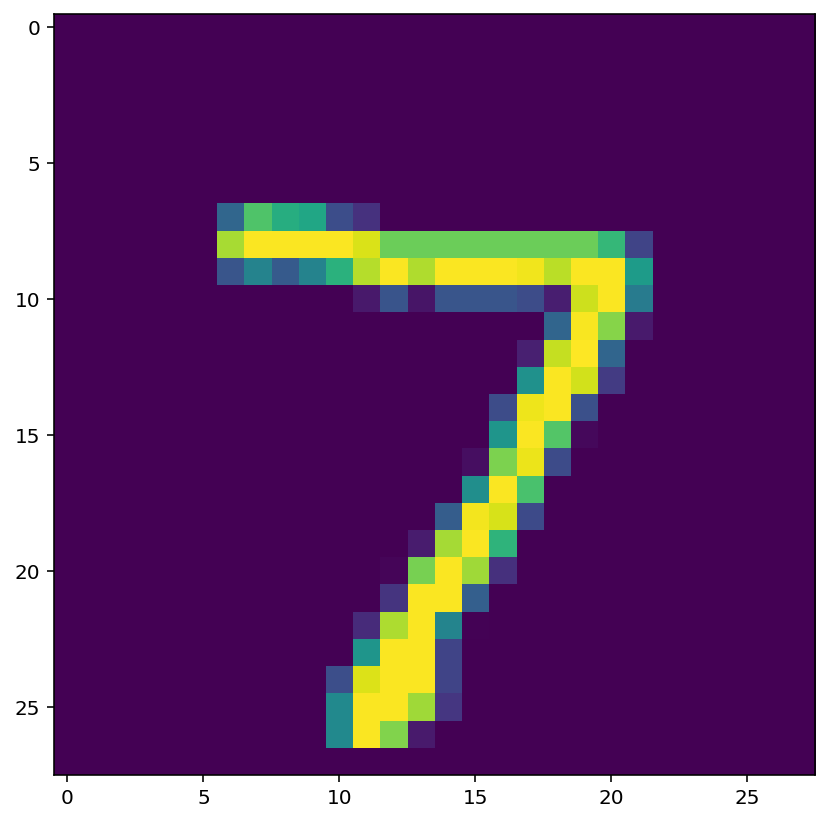

In [10]:
plt.imshow(x_test[0,:,:,0])

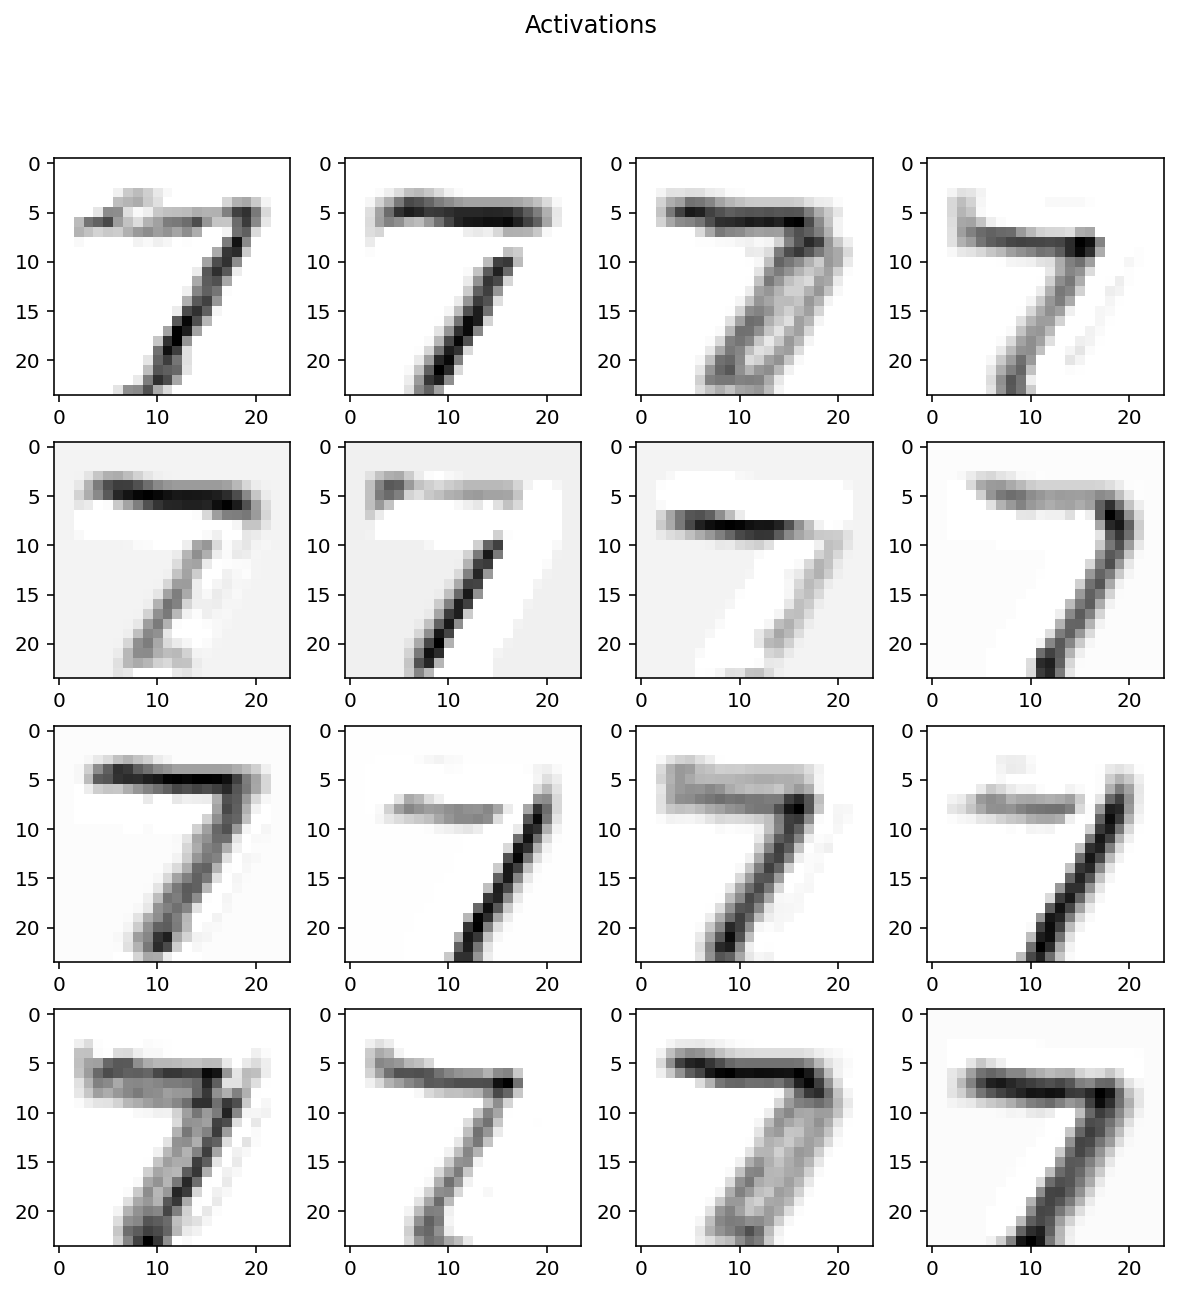

In [37]:
test_image = x_test[0]
test_image = np.expand_dims(test_image,axis=0)
from keras.models import Model
layer_outputs = [ layer.output for layer in model.layers[:]]
multioutput_model = Model(inputs=model.input,outputs=layer_outputs)
activations = multioutput_model.predict(test_image)
ilayer=0
fig, axs = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('Activations')
axs=axs.reshape(16,1)
for ichannel in range(16):
   axs[ichannel,0].imshow(activations[ilayer][0,:,:,ichannel],cmap=plt.cm.binary)


In [31]:
len(activations)

8